In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from helpers import plot_sigma_kmax, plot_spectra_glam, plot_spectra, plot_ratios, plot_glambk

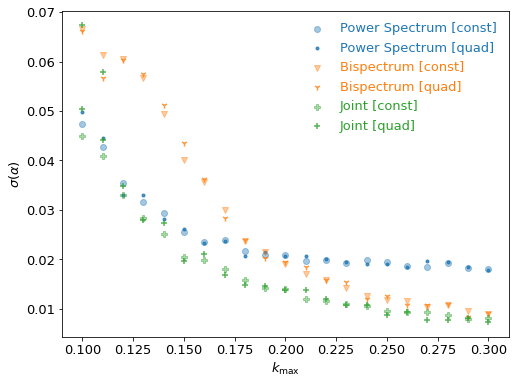

In [3]:
plot_sigma_kmax()

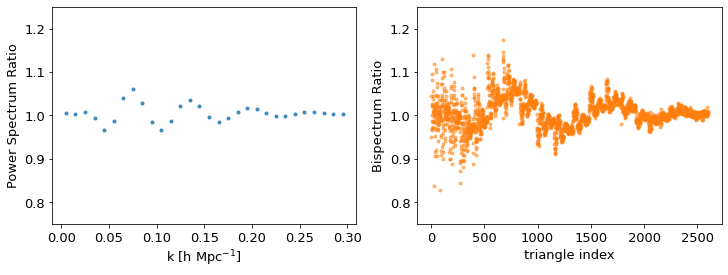

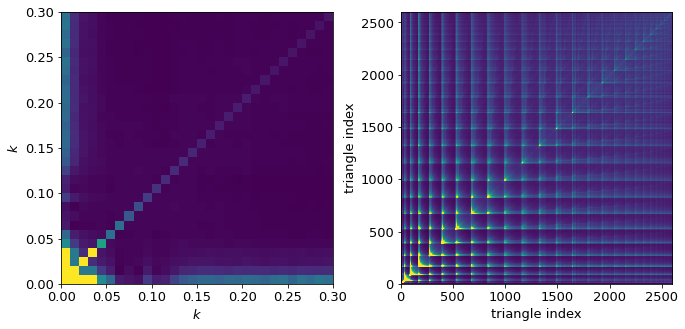

In [4]:
plot_spectra_glam()

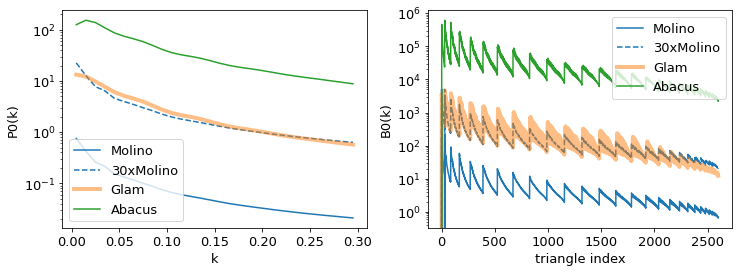

In [5]:
plot_spectra()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


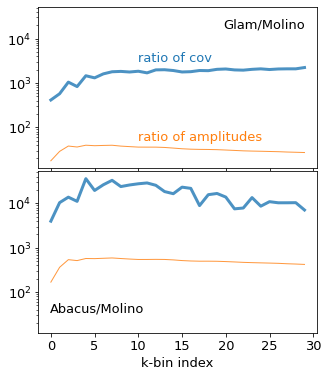

In [6]:
plot_ratios()

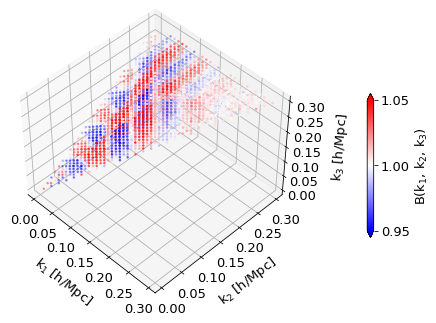

In [7]:
plot_glambk()

In [ ]:
# compare the ratio of covariance (diagonal) to the ratio of amplitudes
# Abacus variance is more sensitive to # of realizations rather than the amplitude

In [8]:
from scipy.stats import binned_statistic

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
d1 = np.load('mcmcs/mcmc_is_pk_kmax_0.12_quad_v1.1.npz')
d2 = np.load('mcmcs/mcmc_is_joint_kmax_0.12_quad_v1.1.npz')
d3 = np.load('mcmcs/mcmc_is_joint_kmax_0.12_quadnobao_v1.1.npz')

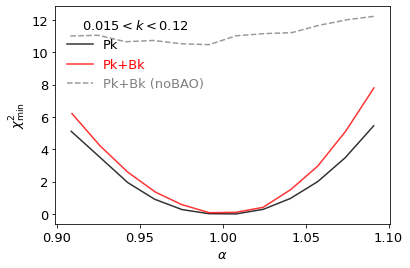

In [53]:
plt.axes(xlabel=r'$\alpha$', ylabel=r'$\chi^{2}_{\rm min}$')
#        ylim=(-0.5, 5.), xlim=(0.94, 1.06))

alpha_edge = np.linspace(0.9, 1.1, num=13)

c = ['k', 'red', 'grey']
ls = ['-', '-', '--']
 
for i, (di, ni) in enumerate(zip([d1, d2, d3],
                                 ['Pk', 'Pk+Bk', 'Pk+Bk (noBAO)'])):
    x = di['chain'][:, :, 0].flatten()
    y = -2.*di['log_prob'].flatten()
    
    ym = binned_statistic(x, y, statistic=np.min, bins=alpha_edge)[0]
    xm = binned_statistic(x, x, statistic=np.mean, bins=alpha_edge)[0]
    
    plt.plot(xm, ym, label=ni, ls=ls[i], color=c[i], alpha=0.8)#, marker='.')
    
leg = plt.legend(frameon=False, title=r'$0.015<k<0.12$', loc=2)
for i, text in enumerate(leg.get_texts()):
    text.set_color(c[i])